# Proof of concept: downloading and plotting the Covid dataset

This is a simple proof of concept that it is possible to download the Covid-19 data set from the 
John Hopkins CSSE and plot graphs like those presented in the Guardian Newspaper.

Please can you work this up into a decent tool so we can have up to date plots easily available to post?

## Python requests
Python requests is a really easy to use tool to download internet data
https://www.pythonforbeginners.com/requests/using-requests-in-python
gives a useful starting guide

In [1]:
import requests

In [2]:
TIME_URL = ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/'
            'csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [3]:
# download the data using requests
response = requests.get(TIME_URL)
status_code = response.status_code
if status_code == 200:
    print('Success response gave status code 200')
else:
    print(f'Error in requests download status_code={status_code}')

Success response gave status code 200


I found https://stackoverflow.com/a/51955129 for how to decode the data

In [4]:
# want to get the data on seperate lines and change from byte to normal string
# lets use response.iter_lines() to do this
#
lines = []
for line in response.iter_lines():
    line = line.decode('utf-8')
    lines.append(line)
print('first 5 lines:')
print('\n'.join(lines[:5]))

first 5 lines:
Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20
Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989
Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399
Chongqing,Mainland China,30.05718,107.874,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573
Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293


**Conclusion: the first 5 lines look good to me**

Now lets read the data from CSV

In [5]:
import csv
rows = []
for row in csv.reader(lines):
        rows.append(row)

In [6]:
for row in rows[0:2]:
    print('country:', row[1], 'date data', row[4:])

country: Country/Region date data ['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20']
country: Mainland China date data ['1', '9', '15', '39', '60', '70', '106', '152', '200', '237', '297', '340', '408', '480', '530', '591', '665', '733', '779', '830', '860', '889', '910', '934', '950', '962', '973', '982', '986', '987', '988', '989']


In [7]:
dates = []
for date in rows[0][4:]:
    month, day, year = date.split('/')
    dates.append(f'{day}/{month}')
totals = [0]*len(dates)
chinas = [0]*len(dates)
others = [0]*len(dates)
for row in rows[1:]:
    country = row[1]
    
    for i_date, cases in enumerate(row[4:]):
        cases = int(cases)
        totals[i_date] += cases
        if 'China' in country:
            chinas[i_date] += cases
        else:
            others[i_date] += cases
for date, total,  china, other in zip(dates, totals, chinas, others):
    print(f'{date}\t{total}\t{china}\t{other}')

22/1	555	547	8
23/1	653	639	14
24/1	941	916	25
25/1	1434	1399	35
26/1	2118	2062	56
27/1	2927	2863	64
28/1	5578	5494	84
29/1	6166	6070	96
30/1	8234	8124	110
31/1	9927	9783	144
1/2	12038	11871	167
2/2	16787	16607	180
3/2	19881	19693	188
4/2	23892	23680	212
5/2	27636	27409	227
6/2	30818	30553	265
7/2	34392	34075	317
8/2	37121	36778	343
9/2	40151	39790	361
10/2	42763	42306	457
11/2	44803	44327	476
12/2	45222	44699	523
13/2	60370	59832	538
14/2	66887	66292	595
15/2	69032	68347	685
16/2	71226	70446	780
17/2	73260	72364	896
18/2	75138	74139	999
19/2	75641	74546	1095
20/2	76199	74999	1200
21/2	76843	75472	1371
22/2	78599	76922	1677


<IPython.core.display.Javascript object>


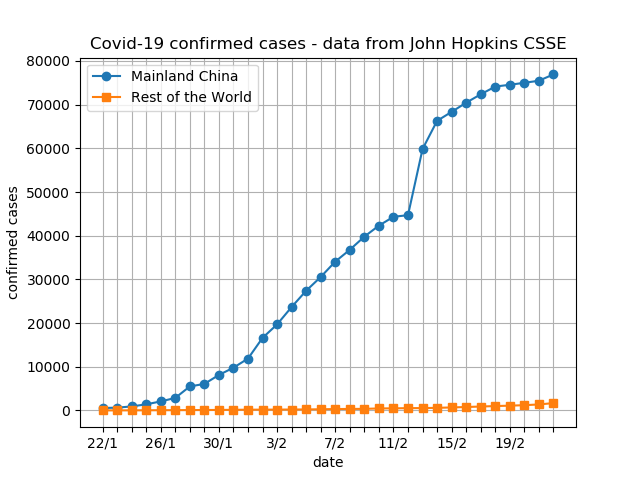

In [8]:
# https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1
%matplotlib notebook
import matplotlib.pyplot as plt
#plt.plot([[0,0],[1,1]], linewidth=5)

fig, ax = plt.subplots()
ax.plot(dates, chinas, marker='o', label='Mainland China')
ax.plot(dates, others, marker='s', label='Rest of the World')
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ax.set(xlabel='date', ylabel='confirmed cases',
       title='Covid-19 confirmed cases - data from John Hopkins CSSE')
ax.grid()
ax.legend()


I am happy with the initial graph that compares well with the Guardian graph https://www.theguardian.com/world/2020/feb/17/coronavirus-causes-mild-disease-in-four-in-five-patients-says-who

# Thoughts

* Please can you produce a similar graph for deaths
* What would a logarithmic graph look like?
* It should be simple to produce a similar graph for deaths?
* I would really like to see separate graphs for 
  * Total
  * Mainland China 
  * Diamond Princess
  * Asia (excluding Mainland China & Diamond Princess)
  * Europe
  * The Americas

# Pandas try

It would be great to use Pandas rather than Python lists. I had a quick go below but ran out of time. Can you sort it?

In [9]:
with open('temp.csv', 'w') as fh:
    fh.write(response.text)

In [10]:
import pandas as pd
pd_time_series = pd.read_csv('temp.csv')
print(pd_time_series.head(3))

  Province/State  Country/Region       Lat      Long  1/22/20  1/23/20  \
0          Anhui  Mainland China  31.82571  117.2264        1        9   
1        Beijing  Mainland China  40.18238  116.4142       14       22   
2      Chongqing  Mainland China  30.05718  107.8740        6        9   

   1/24/20  1/25/20  1/26/20  1/27/20   ...     2/13/20  2/14/20  2/15/20  \
0       15       39       60       70   ...         910      934      950   
1       36       41       68       80   ...         366      372      375   
2       27       57       75      110   ...         529      537      544   

   2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  
0      962      973      982      986      987      988      989  
1      380      381      387      393      395      396      399  
2      551      553      555      560      567      572      573  

[3 rows x 36 columns]


In [11]:
print(pd_time_series.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 36 columns):
Province/State    60 non-null object
Country/Region    84 non-null object
Lat               84 non-null float64
Long              84 non-null float64
1/22/20           84 non-null int64
1/23/20           84 non-null int64
1/24/20           84 non-null int64
1/25/20           84 non-null int64
1/26/20           84 non-null int64
1/27/20           84 non-null int64
1/28/20           84 non-null int64
1/29/20           84 non-null int64
1/30/20           84 non-null int64
1/31/20           84 non-null int64
2/1/20            84 non-null int64
2/2/20            84 non-null int64
2/3/20            84 non-null int64
2/4/20            84 non-null int64
2/5/20            84 non-null int64
2/6/20            84 non-null int64
2/7/20            84 non-null int64
2/8/20            84 non-null int64
2/9/20            84 non-null int64
2/10/20           84 non-null int64
2/11/20           84 non-nu

In [12]:
print(pd_time_series.describe())

             Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  84.000000   84.000000   84.000000   84.000000   84.000000   84.000000   
mean   30.803410   49.798217    6.607143    7.773810   11.202381   17.071429   
std    18.446502   92.656578   48.432295   48.490305   60.182810   83.559197   
min   -37.813600 -123.869500    0.000000    0.000000    0.000000    0.000000   
25%    26.630978    0.801275    0.000000    0.000000    0.000000    0.000000   
50%    33.965460  103.265050    0.000000    0.000000    0.000000    1.000000   
75%    40.661075  115.895125    1.000000    2.250000    4.000000    8.250000   
max    61.924100  153.025100  444.000000  444.000000  549.000000  761.000000   

           1/26/20      1/27/20      1/28/20      1/29/20      ...       \
count    84.000000    84.000000    84.000000    84.000000      ...        
mean     25.214286    34.845238    66.404762    73.404762      ...        
std     116.573476   156.931686   387.733765   389.277

In [13]:
pd.to_datetime('2/22/20')

Timestamp('2020-02-22 00:00:00')